# Probabilistic Algorithms

- **Created by Andrés Segura Tinoco**
- **Created on May 17, 2019**

## Intro
A probabilistic algorithm is an algorithm that employs a degree of randomness as part of its logic. The algorithm typically uses uniformly random bits as an auxiliary input to guide its behavior, in the hope of achieving good performance in the "average case" over all possible choices of random bits.

In [1]:
# Load the Python libraries
import random
import numpy as np
from datetime import datetime
from scipy import stats
from scipy.stats import triang

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

## 1. Generator of pseudo-random numbers

In [3]:
# Creating a random value (no uniform)
ms = datetime.now().microsecond / 1000
ms

573.405

In [4]:
# Set random seed based on machine time
random.seed(ms)

# Creating and showing 10 pseudo-random numbers
for i in range(10):
    num = 1 + random.random() * 9
    print(num)

6.448560675368101
4.014929041352673
1.561947507865213
8.717365444986996
1.96706358214999
8.253645908155097
3.429151747934147
1.5336446815386975
2.3306276456796198
7.54737061383286


In [5]:
# This function gets a random number from a uniform distribution between the two input values [min_value, max_value] inclusively
def get_random_number(min_value, max_value):
    range = max_value - min_value
    num = np.random.uniform(0, 1)
    return min_value + range * num;

In [6]:
# Creating and showing 10 pseudo-random numbers
for i in range(10):
    print(get_random_number(1, 10))

4.082282420245675
2.7732688730596733
5.675481286106708
3.681093484600672
8.168909933797456
9.05642987642194
6.757221156654101
6.255479186887602
6.3202285103673725
2.821925026211689


## 2. Monte-Carlo Simulation

Monte-Carlo methods are non-deterministic or stochastic algorithms, and are based on the use or generation of pseudo-random numbers to model or simulate different phenomena.

In [7]:
# Function that plot the circle area with n points
def plot_circle_area(ix, func, n, p1, p2):
    x = func(p1, p2, n)
    y = func(p1, p2, n)
    r = 1
    d = 2 * r
    
    inside = (x**2 + y**2) <= r
    outside = np.invert(inside)
    pi = inside.sum() / n * d**2
    error = abs((pi - np.pi) / pi) * 100
    
    # Plot circle density
    plt.subplot(2, 3, ix)
    plt.plot(x[inside], y[inside], ".", color = '#1f77b4')
    plt.plot(x[outside], y[outside], ".", color = '#ff7f0e')
    plt.plot(0, 0, label='$\hat \pi$ = {:3.3f}\nerror = {:3.3f}%'.format(pi, error), alpha = 0)
    plt.axis('square')
    plt.xlabel('n = ' + str(n))
    plt.legend(fontsize = 11, loc = 'upper right', frameon = True)
    
    # Plot histogram
    xy = list(np.concatenate((x, y)))
    plt.subplot(2, 3, (3 + ix))
    plt.hist(xy, bins = 100, color = '#2ca02c')
    plt.xlabel('Weight')
    plt.ylabel('Probability')

### Normal distribution

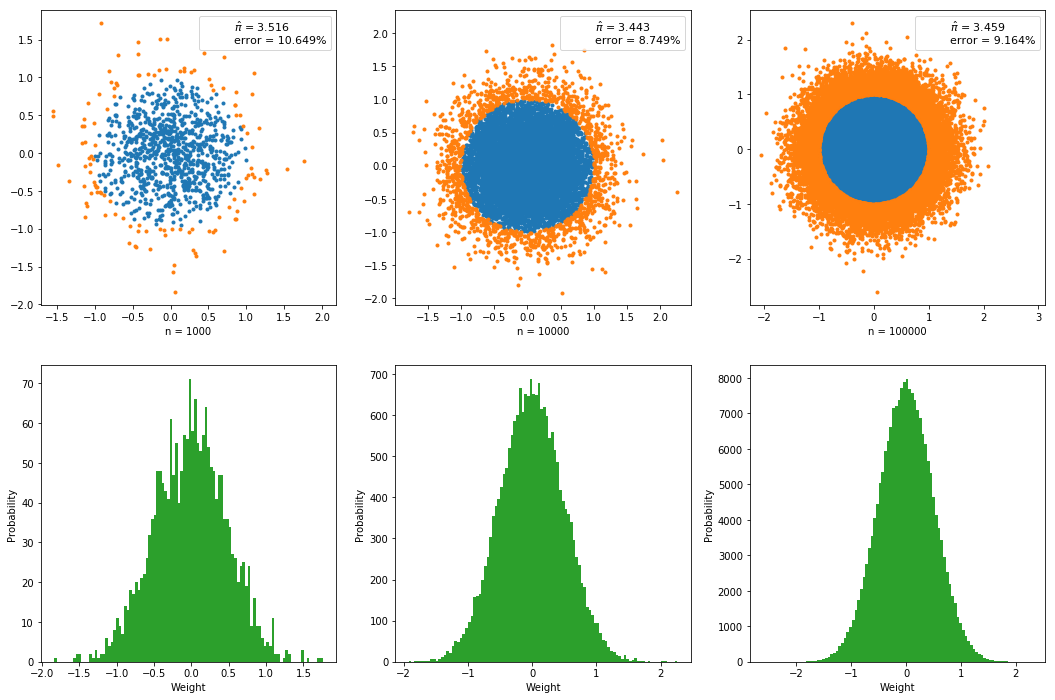

In [8]:
# Plot 3 samples with different N size
fig = plt.figure(figsize = (18, 12))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)
func = np.random.normal

# With 1k points
plot_circle_area(1, func, 1000, 0, 0.5)

# With 10k points
plot_circle_area(2, func, 10000, 0, 0.5)

# With 100k points
plot_circle_area(3, func, 100000, 0, 0.5)

### Uniform distribution

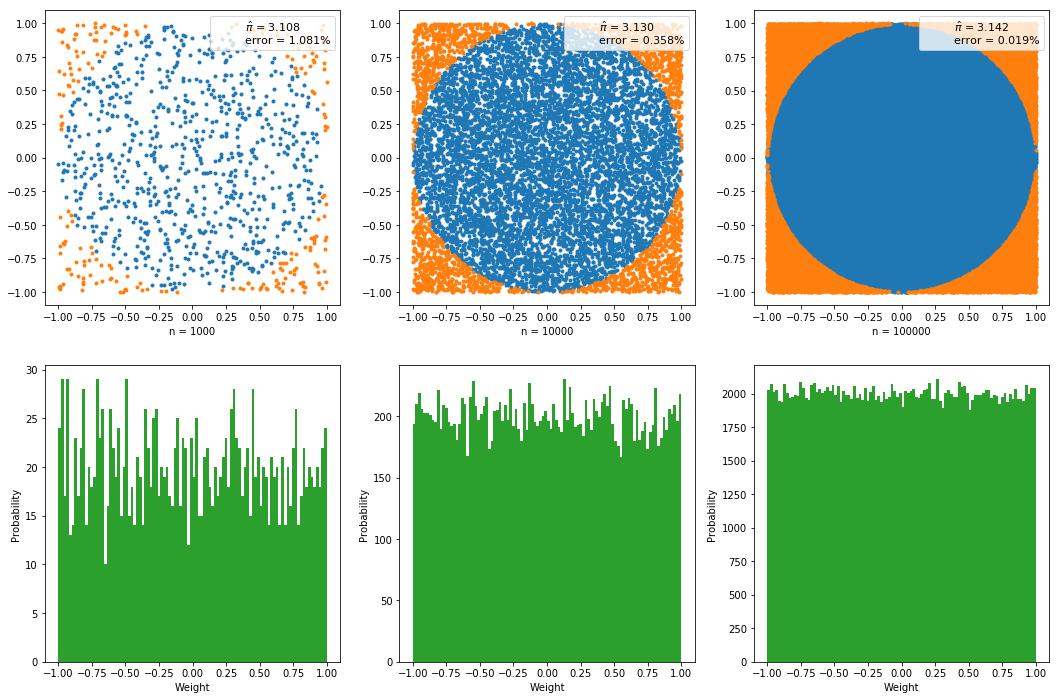

In [9]:
# Plot 3 samples with different N size
fig = plt.figure(figsize = (18, 12))
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)
func = np.random.uniform

# With 1k points
plot_circle_area(1, func, 1000, -1, 1)

# With 10k points
plot_circle_area(2, func, 10000, -1, 1)

# With 100k points
plot_circle_area(3, func, 100000, -1, 1)

## 3. Metropolis-Hastings algorithm

In statistics and statistical physics, the **Metropolis–Hastings algorithm** is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. This sequence can be used to approximate the distribution (e.g. to generate a histogram) or to compute an integral (e.g. an expected value).

In [10]:
# A very simple Metropolis implementation
def metropolis_hastings(func, steps = 10000):
    sample = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        accept = new_prob / old_prob
        if accept >= np.random.random():
            sample[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            sample[i] = old_x
    
    return sample

In [11]:
# Function that plot the data distribution
def plotDist(data, x, y, xll, xrl):
    plt.figure(figsize = (8, 8))
    plt.xlim(xll, xrl)
    plt.plot(x, y, '-', color = '#ff7f0e', lw = 3, label = 'Real distribution')
    plt.hist(data, bins = 50, density = True, label = 'MCMC Estimated distribution')
    plt.xlabel('$x$', fontsize = 12)
    plt.ylabel('$pdf(x)$', fontsize = 12)
    plt.legend(fontsize = 11, loc = 'upper right', frameon = True)
    plt.show()

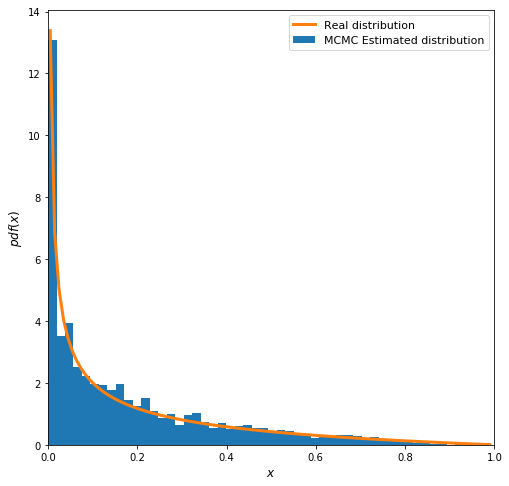

In [12]:
# Beta distribución: n = 10k
func = stats.beta(0.4, 2)
samples = metropolis_hastings(func=func)
x = np.linspace(0.005, .99, 100)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, 0, 1)

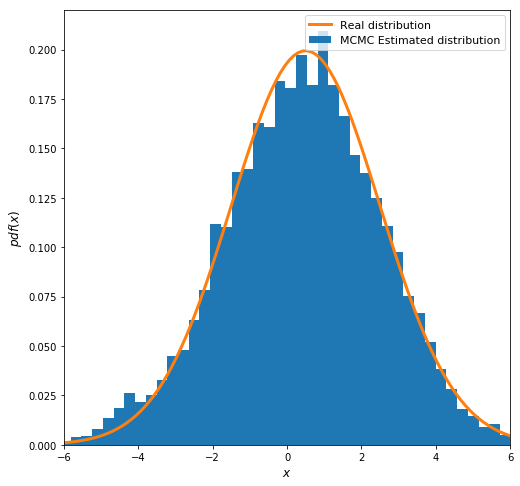

In [13]:
# Normal distribución: n = 10k
func = stats.norm(0.5, 2)
samples = metropolis_hastings(func = func)
x = np.linspace(-6, 6, 100)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, -6, 6)

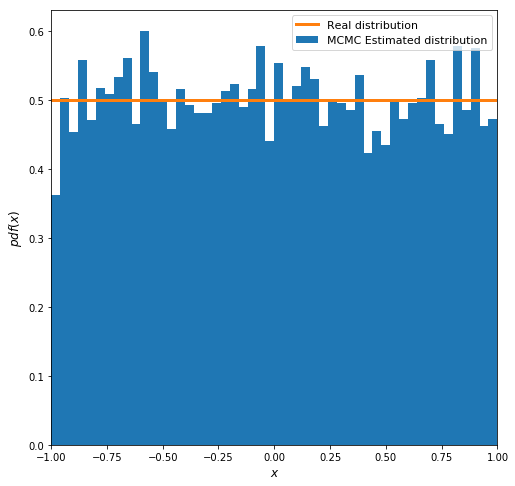

In [14]:
# Uniform distribución: n = 10k
func = stats.uniform(-1, 2)
samples = metropolis_hastings(func = func)
x = np.linspace(-1, 1, 2)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, -1, 1)

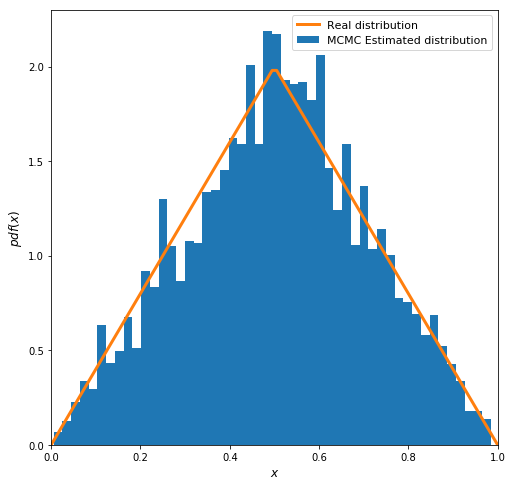

In [15]:
# Triangule distribución: n = 10k
c = 0.5
func = stats.triang(c)
samples = metropolis_hastings(func = func)
x = np.linspace(triang.ppf(0.0, c), triang.ppf(1, c), 100)
y = func.pdf(x)

# Plot results
plotDist(samples, x, y, 0, 1)

<hr>
<p><a href="https://ansegura7.github.io/Algorithms/">« Home</a></p>